In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('digit_data.csv')

In [3]:
number_of_data = df.shape[0]
number_of_features = df.shape[1]

In [4]:
numpy_df = df.to_numpy()

In [5]:
np.random.shuffle(numpy_df)

In [6]:
test_data = numpy_df[:1000].T
train_data = numpy_df[1000:].T

In [7]:
test_data_label = test_data[0]
train_data_label = train_data[0]

In [8]:
train_data = train_data[1:,:]/255
test_data = test_data[1:,:]/255

In [9]:
train_data.shape

(784, 41000)

In [10]:
def plot_image(index):
    reshaped_image = train_data.T[index].reshape(28,28)
    print(f'Image is of Number {train_data_label[index]}')
    plt.imshow(reshaped_image)

Image is of Number 6


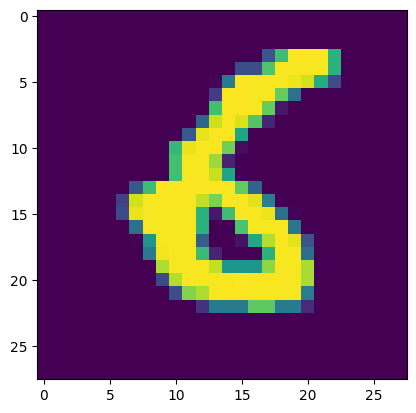

In [11]:
plot_image(325)

In [12]:
# using gumbel function to initalize the weight
def initialize_weights(x_dimension, y_dimension):
    generated = np.random.gumbel(loc=-0.00001,scale=0.001, size=(x_dimension, y_dimension))
    # generated = np.random.uniform(-0.05, 0.05,size=(x_dimension,y_dimension))
    return generated

In [13]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = initialize_weights(hidden_size, input_size)
    b1 = np.zeros((hidden_size,1))
    W2 = initialize_weights(hidden_size, output_size)
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

In [14]:
def relu(x):
    return np.maximum(x, 0)

In [15]:
def derivative_relu(x):
    return np.where(x > 0, 1, 0)

In [16]:
# def softmax(x):
#     total_sum = np.sum(x)
#     return np.exp(x)/total_sum

In [17]:
def softmax(input_vector):
    exp_values = np.exp(input_vector - np.max(input_vector))
    return exp_values / np.sum(exp_values)

In [18]:
def forward_propagation(w1, b1, w2, b2, train_data):
    z1 = np.dot(w1, train_data) + b1
    A1 = relu(z1)
    z2 = np.dot(w2, A1) + b2
    A2 = softmax(z2)
    return z1, A1, z2, A2

In [19]:
def one_hot_encoding(Y):
    return pd.get_dummies(Y, dtype=float)

In [20]:
def backward_propagation(z1, A1, z2, A2, w1, w2, train_data, train_data_label):
    m = train_data.shape[1]
    dz2 = A2 - train_data_label
    dw2 = np.dot(dz2,A1.T)/m
    db2 = np.sum(z2, axis=1, keepdims=True)/m
    dz1 = np.dot(w2.T, np.multiply(dz2, derivative_relu(z1)))
    dw1 = np.dot(dz1,train_data.T)/m
    db1 = np.sum(z1, axis=1, keepdims=True)/m

    return dw1, db1, dw2, db2

In [21]:
def update_parameter(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate):
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    return w1, b1, w2, b2

In [22]:
def obtain_prediction(A2):
    return np.argmax(A2, axis=0)

In [23]:
def accuracy_score(ground_truth, predicted):
    num_total_samples = ground_truth.shape[0]

    if ground_truth.ndim == 2:
        actual_label = obtain_prediction(ground_truth)
    else:
        actual_label = ground_truth
        
    if predicted.ndim == 2:
        predicted_label = obtain_prediction(predicted)
    else:
        predicted_label = predicted
    
    num_total_correct = np.sum(predicted_label == actual_label)

    return (num_total_correct / num_total_samples)

In [24]:
def gradient_descent(train_data, train_data_label, learning_rate, number_of_iterations):
    w1, b1, w2, b2 = initialize_parameters(784, 10, 10)
    

    accuracy_list = []

    for i in range(number_of_iterations+1):
        z1, A1, z2, A2 = forward_propagation(w1, b1, w2, b2, train_data)
        dw1, db1, dw2, db2 = backward_propagation(z1, A1, z2, A2, w1, w2, train_data, train_data_label)
        w1, b1, w2, b2 = update_parameter(w1, b1, w2, b2, dw1, db1, dw2, db2, learning_rate)


        if i%10==0:
            accuracy = accuracy_score(train_data_label, A2)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return w1, b1, w2, b2, accuracy_list
    

In [25]:
train_data.shape

(784, 41000)

In [26]:
w1, b1, w2, b2, accuracy_list = gradient_descent(train_data, train_data_label, learning_rate=0.00001, number_of_iterations=1000)

Iteration: 0 	 Accuracy: 0.10476
Iteration: 10 	 Accuracy: 0.10478
Iteration: 20 	 Accuracy: 0.10483
Iteration: 30 	 Accuracy: 0.10483
Iteration: 40 	 Accuracy: 0.10480
Iteration: 50 	 Accuracy: 0.10480
Iteration: 60 	 Accuracy: 0.10480
Iteration: 70 	 Accuracy: 0.10480
Iteration: 80 	 Accuracy: 0.10480
Iteration: 90 	 Accuracy: 0.10483
Iteration: 100 	 Accuracy: 0.10485
Iteration: 110 	 Accuracy: 0.10485
Iteration: 120 	 Accuracy: 0.10488
Iteration: 130 	 Accuracy: 0.10490
Iteration: 140 	 Accuracy: 0.10490
Iteration: 150 	 Accuracy: 0.10490
Iteration: 160 	 Accuracy: 0.10490
Iteration: 170 	 Accuracy: 0.10490
Iteration: 180 	 Accuracy: 0.10490
Iteration: 190 	 Accuracy: 0.10488
Iteration: 200 	 Accuracy: 0.10488
Iteration: 210 	 Accuracy: 0.10490
Iteration: 220 	 Accuracy: 0.10490
Iteration: 230 	 Accuracy: 0.10495
Iteration: 240 	 Accuracy: 0.10495
Iteration: 250 	 Accuracy: 0.10495
Iteration: 260 	 Accuracy: 0.10498
Iteration: 270 	 Accuracy: 0.10498
Iteration: 280 	 Accuracy: 0.10

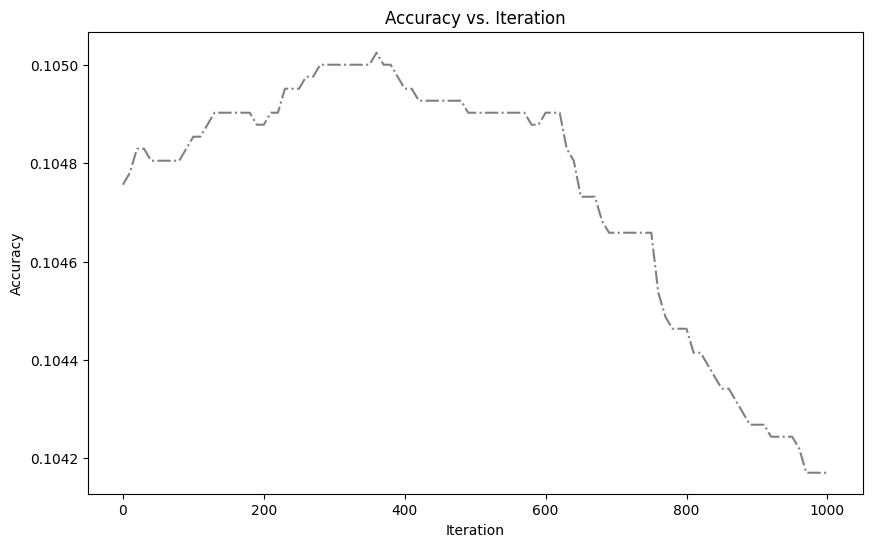

In [27]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, linestyle='-.', color='grey')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(False)
plt.savefig('Gumbel2.png')
plt.show()

In [28]:
def make_test_predictions(w1, b1, w2, b2, test_data):
    _,_,_, A2 = forward_propagation(w1, b1, w2, b2, test_data)
    test_prediction = obtain_prediction(A2)
    return test_prediction

In [29]:
def plot_test_image(image):
    reshaped = image.reshape(28,-1)
    plt.imshow(reshaped)
    plt.show()
    return 'done'

In [30]:
def test_predictions(W1, b1, W2, b2, X_test, y_test):
    test = make_test_predictions(W1, b1, W2, b2, X_test)
    image = X_test.T
    accuracy = accuracy_score(y_test, test)
    print(f"Accuracy:{accuracy}")
    for i in range(10):
        print(f'test predicted value is {test[i]} and ground truth is {y_test[i]}')
        plot_test_image(image[i])

Accuracy:0.111
test predicted value is 3 and ground truth is 8


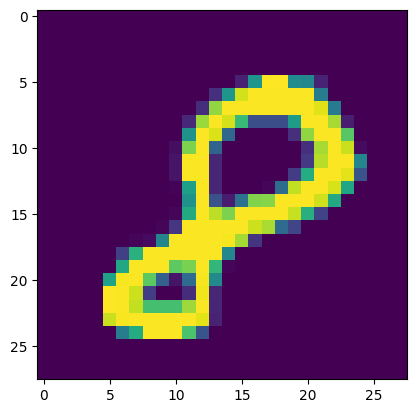

test predicted value is 3 and ground truth is 3


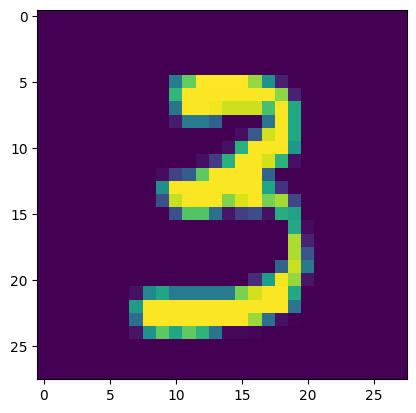

test predicted value is 3 and ground truth is 4


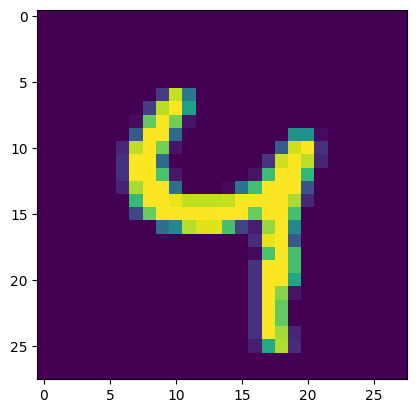

test predicted value is 3 and ground truth is 0


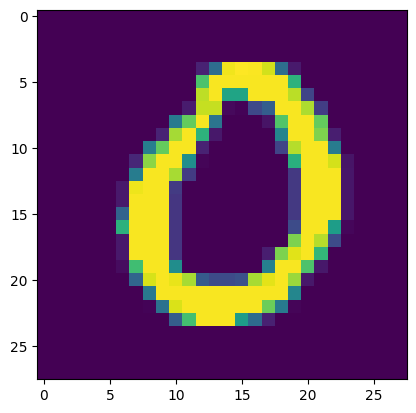

test predicted value is 3 and ground truth is 0


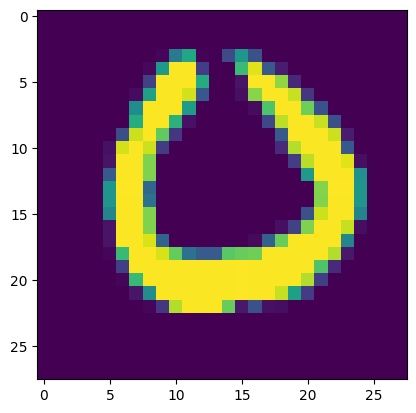

test predicted value is 3 and ground truth is 2


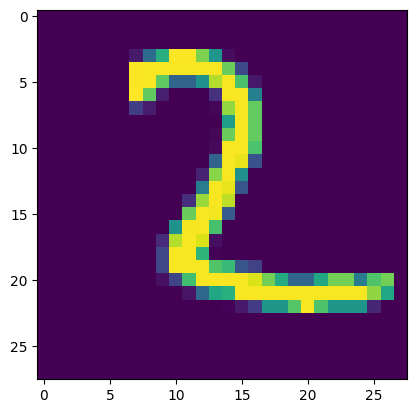

test predicted value is 3 and ground truth is 4


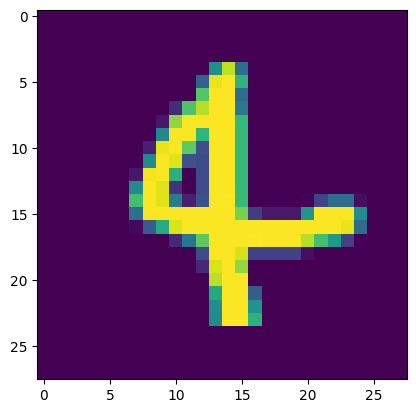

test predicted value is 3 and ground truth is 1


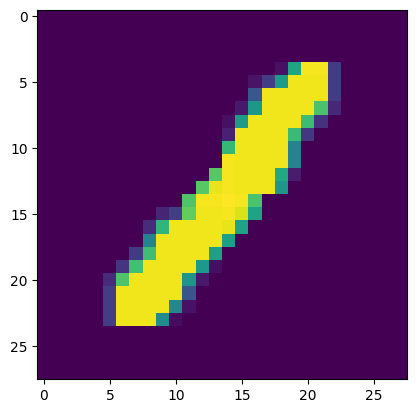

test predicted value is 3 and ground truth is 7


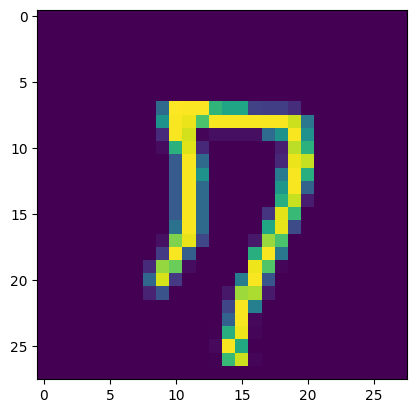

test predicted value is 3 and ground truth is 4


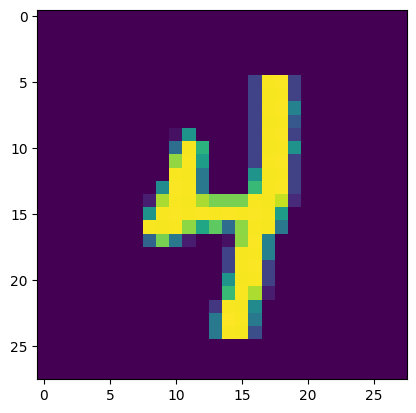

In [31]:
test_predictions(w1, b1, w2, b2, test_data, test_data_label)